In [45]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np

# Fetching the California housing dataset
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target  # Adding the target variable to the DataFrame

# Convert DataFrame to numpy array if you prefer working with numpy
H = data.to_numpy()

# b will contain the Median House Values
b = H[:, -1]  # The last column is 'MedHouseVal', the target

# A will contain all other factors (all columns except the last one)
A = H[:, :-1]  # All columns except the last

# Optionally, confirm dimensions and view some data
print("Dimensions of A:", A.shape)
print("First 5 rows of A:", A[:5])
print("First 5 elements of b:", b[:5])


Dimensions of A: (20640, 8)
First 5 rows of A: [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
First 5 elements of b: [4.526 3.585 3.521 3.413 3.422]


In [46]:
# Set figure size and font size for plots
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})


# Pad with ones for nonzero offset
A = np.pad(A, ((0, 0), (0, 1)), mode='constant', constant_values=1)

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b



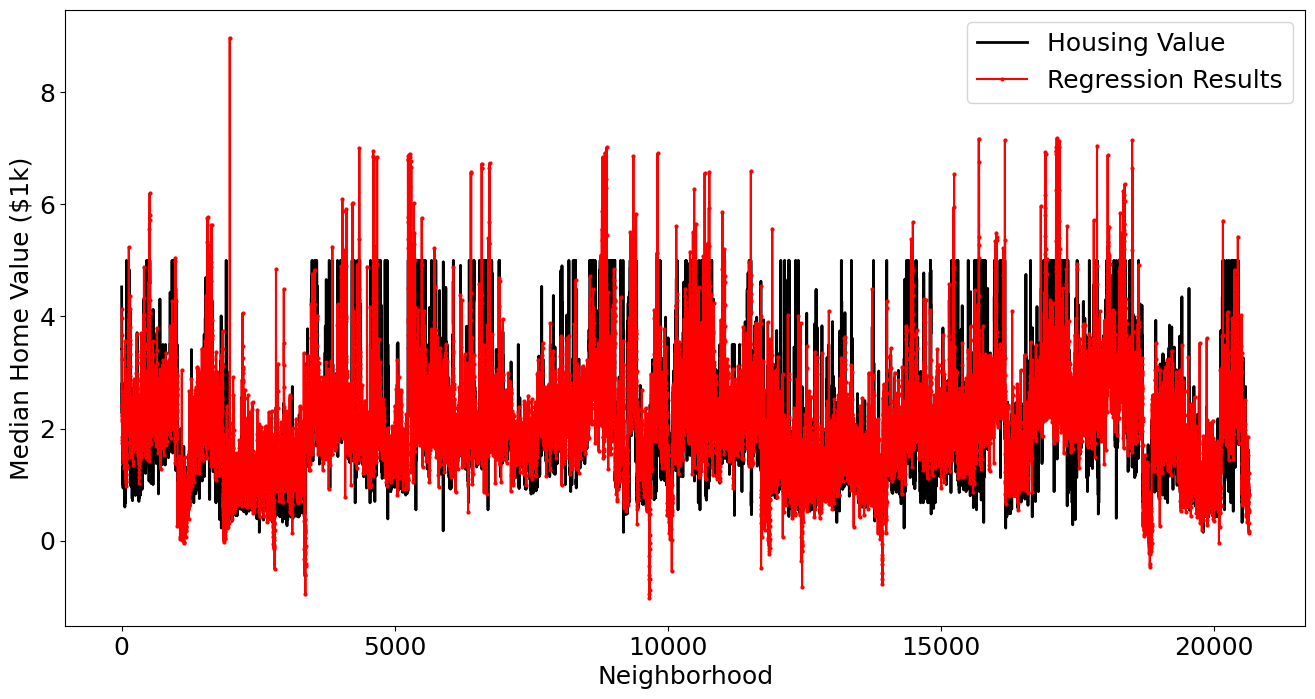

In [55]:
# Create a figure and a subplot
fig = plt.figure()

# Plot housing values
plt.plot(b, 'k-', linewidth=2, label='Housing Value')  # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=2, label='Regression Results')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value ($1k)')
plt.legend()


plt.show()


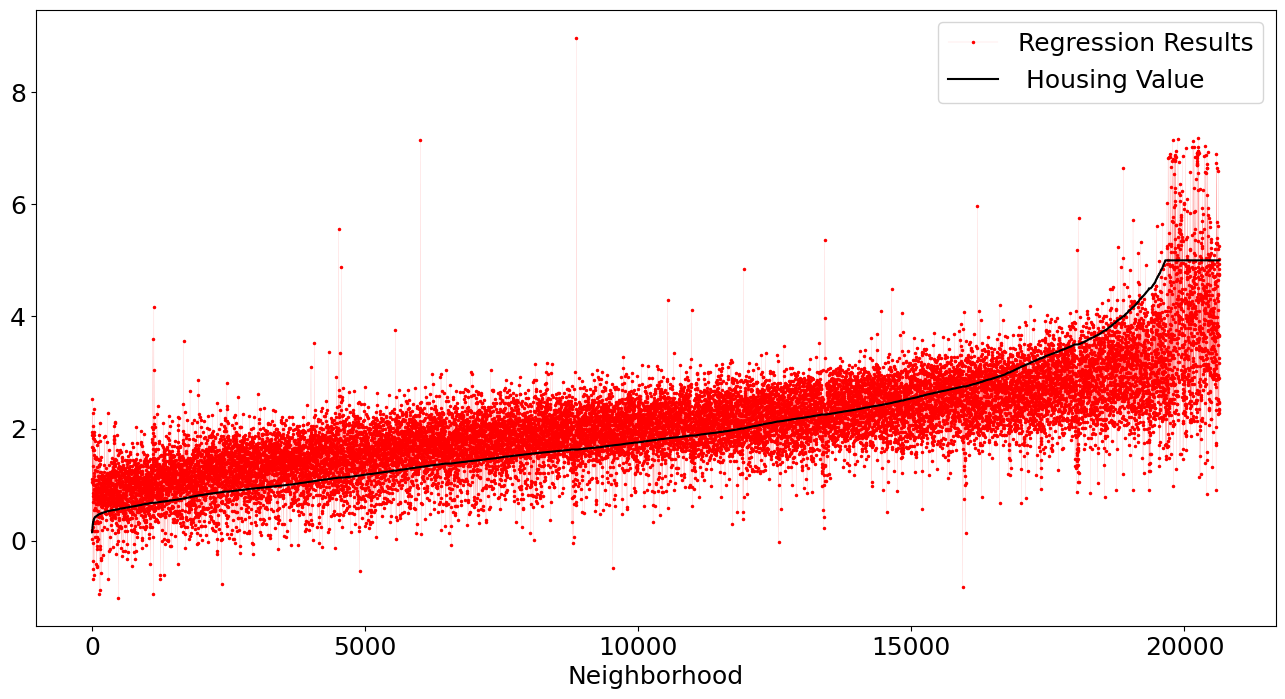

In [54]:

# Add subplot for sorting neighborhoods by predicted value

fig = plt.figure()
sort_ind = np.argsort(H[:, -1])

plt.plot(A[sort_ind,:]@x , '-o', color='r', linewidth=0.05, markersize=1.5, label='Regression Results')
plt.plot(b[sort_ind], 'k-', label=' Housing Value')
plt.xlabel('Neighborhood')
plt.legend()




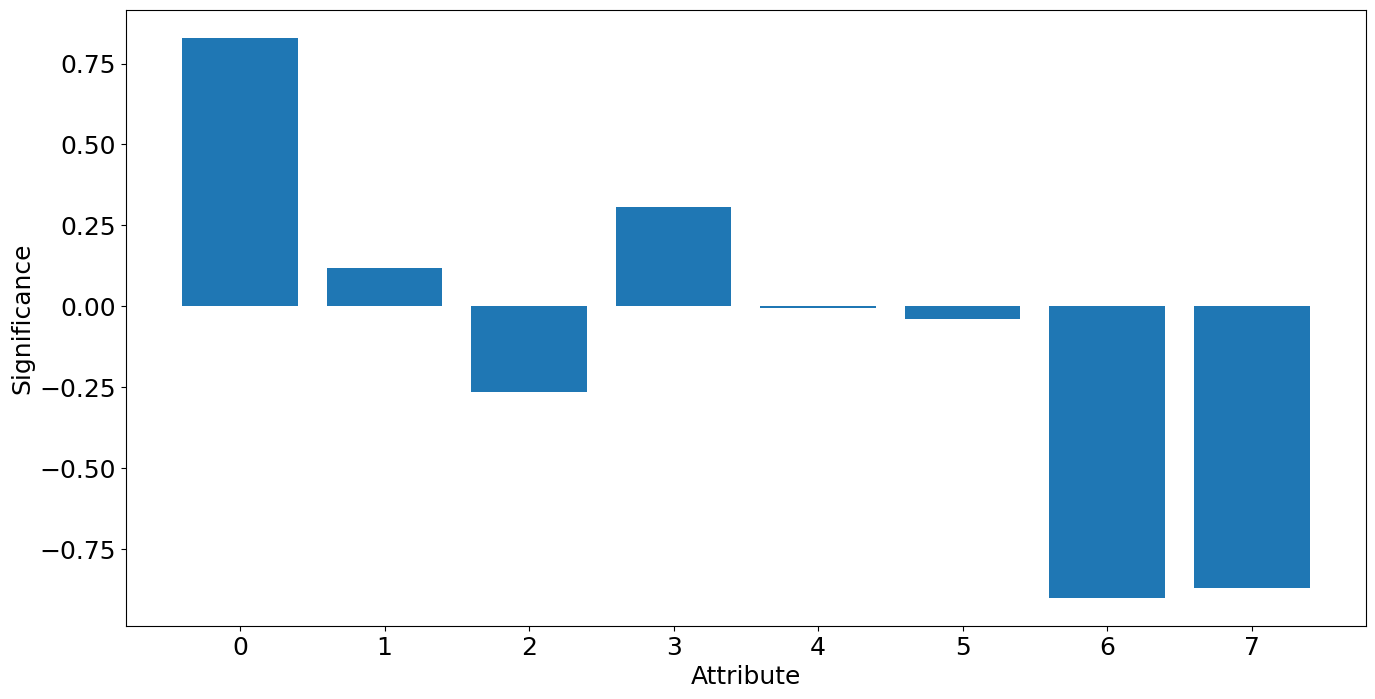

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Assume A is defined somewhere as your data matrix
# Calculating the mean of each column in A
A_mean = np.mean(A, axis=0)
A_mean = A_mean.reshape(-1, 1)

# Subtract the mean from A to center the data
A2 = A - np.ones((A.shape[0], 1)) @ A_mean.T

# Standardize each column to have unit variance
for j in range(A.shape[1]-1):  # Avoid the last column if it's the target or bias
    A2std = np.std(A2[:, j])
    A2[:, j] = A2[:, j] / A2std

# Add a column of ones for the intercept term
A2[:, -1] = np.ones(A.shape[0])

# Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(A2, full_matrices=False)

# Use the singular values to perform linear regression
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

# Prepare x-ticks for plotting significance of attributes
x_tick = range(len(x)-1)  # Ignore the last element if it corresponds to the intercept
plt.bar(x_tick, x[:-1])  # Plot all but the intercept

# Set labels for the plot
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)

# Display the plot
plt.show()


The variables 0, 6 and 7 are extremelly correlated

This last part is to understand the importance of the random permutation. This type of action improves a lot on the performance train and consequently offer a good test quality.

In [57]:

import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np

# Fetching the California housing dataset
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target  # Adding the target variable to the DataFrame

# Convert DataFrame to numpy array if you prefer working with numpy
H = data.to_numpy()

# b will contain the Median House Values
b = H[:, -1]  # The last column is 'MedHouseVal', the target

# A will contain all other factors (all columns except the last one)
A = H[:, :-1]  # All columns except the last


# Pad with ones for nonzero offset
A = np.pad(A, ((0, 0), (0, 1)), mode='constant', constant_values=1)

# Split data into training and test sets
n = 2500;  # number of training examples
p = np.random.permutation(5000);  # permutation array
A = A[p, :]
b = b[p]
b_train = b[:n]
A_train = A[:n, :]
b_test = b[n:]
A_test = A[n:, :]

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A_train, full_matrices=False)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b_train



PLotting the train graph.

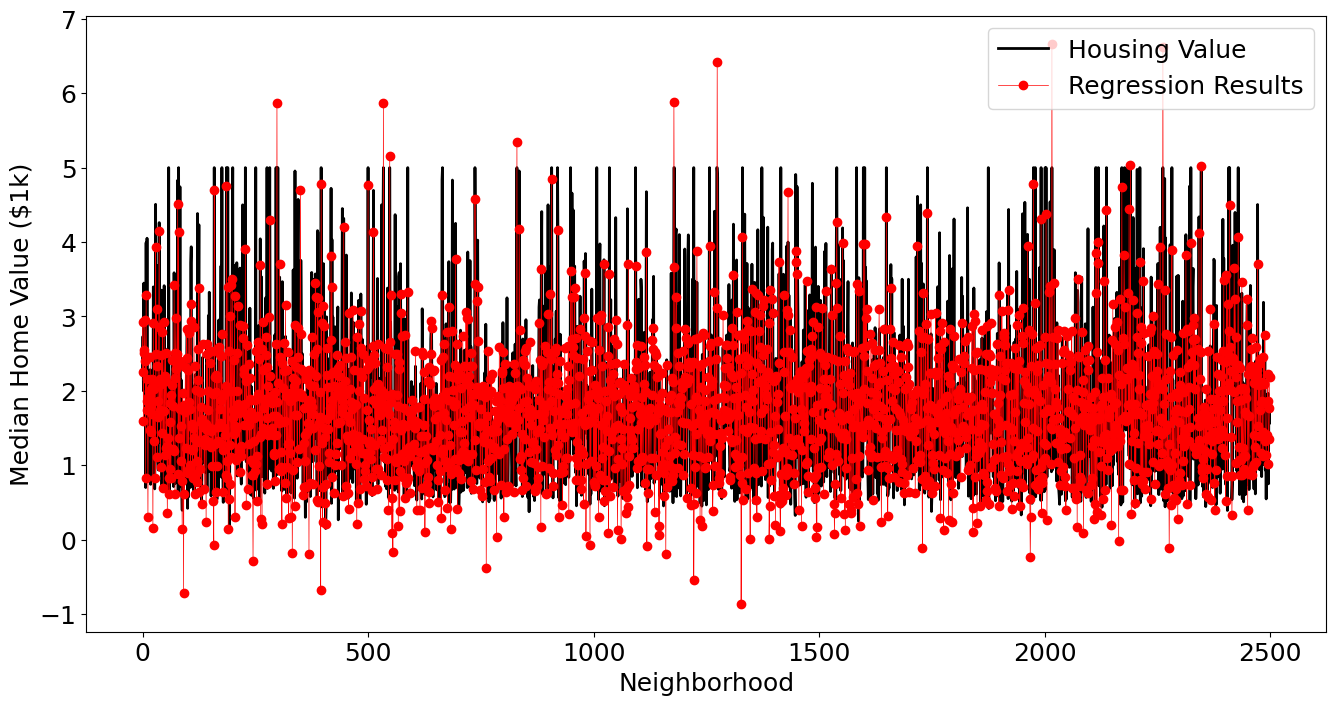

In [60]:

# Create a figure
fig = plt.figure()

# Plot training data
plt.plot(b_train, 'k-', linewidth=2, label='Housing Value')  # True relationship
plt.plot(A_train @ x, '-o', color='r', linewidth=0.5, markersize=6, label='Regression Results')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value ($1k)')
plt.legend()

# Assuming additional plots or analysis will follow

ploting the test graph

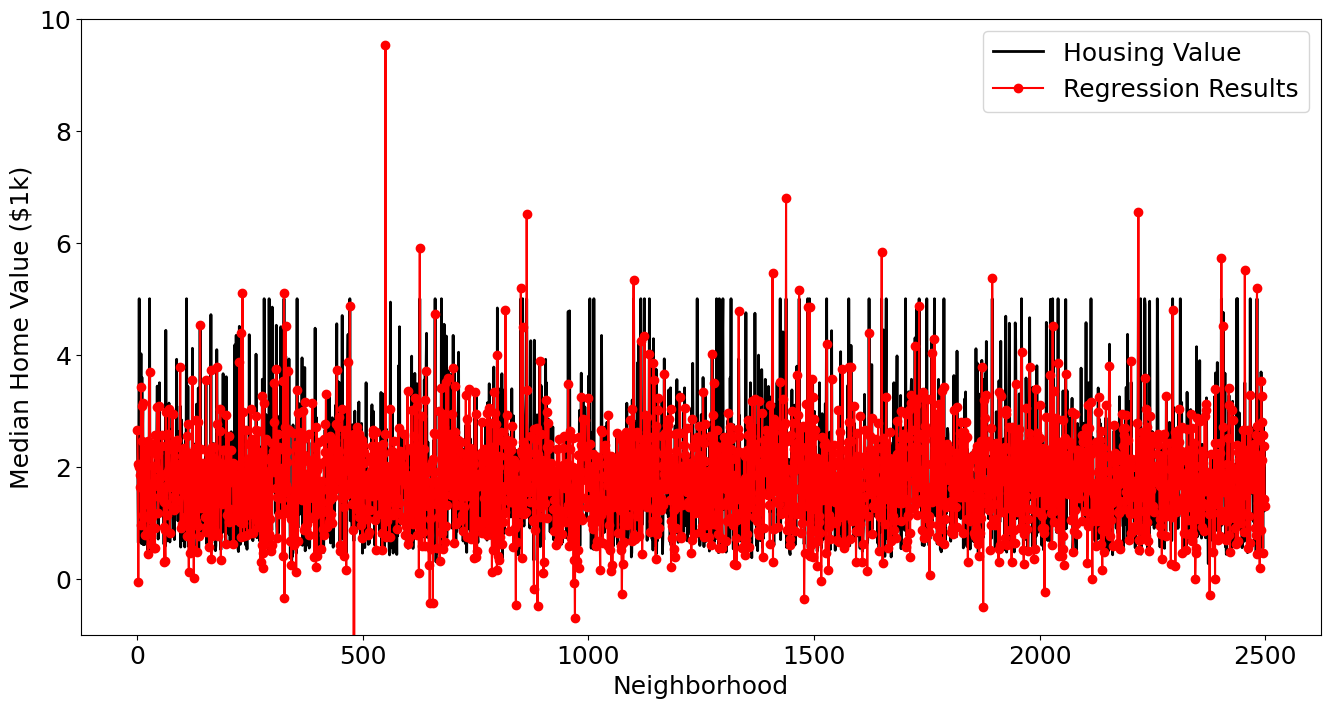

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure
fig = plt.figure()

# Plot training data
plt.plot(b_test, 'k-', linewidth=2, label='Housing Value')  # True relationship
plt.plot(A_test @ x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression Results')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value ($1k)')
plt.legend()

# Set the y-axis to start at -1
plt.ylim(bottom=-1)
plt.ylim(top=+10)
# Show the plot
plt.show()
